**Seeding for reproducibility**

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [3]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     -------------- ------------------------- 30.7/82.1 kB 1.4 MB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.1 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 82.1/82.1 kB 659.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ---------------------------------------- 78.2/78.2 kB 4.5 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105128 sha256=c39cdf864bb7aa691e00c1a8f3446d9e2c337576cc15b6093f63138728f8bca0
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\ec\d9\04\93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built kaggle


In [3]:
kaggle_credentails = json.load(open("kaggle.json"))

In [4]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:01<53:43, 679kB/s]
  0%|          | 2.00M/2.04G [00:01<26:52, 1.36MB/s]
  0%|          | 3.00M/2.04G [00:01<16:39, 2.19MB/s]
  0%|          | 5.00M/2.04G [00:02<08:53, 4.10MB/s]
  0%|          | 7.00M/2.04G [00:02<05:46, 6.30MB/s]
  0%|          | 9.00M/2.04G [00:02<04:27, 8.14MB/s]
  1%|          | 11.0M/2.04G [00:02<03:32, 10.2MB/s]
  1%|          | 13.0M/2.04G [00:02<03:10, 11.4MB/s]
  1%|          | 15.0M/2.04G [00:02<02:49, 12.9MB/s]
  1%|          | 17.0M/2.04G [00:02<02:36, 13.9MB/s]
  1%|          | 19.0M/2.04G [00:02<02:25, 14.9MB/s]
  1%|          | 21.0M/2.04G [00:03<02:22, 15.3MB/s]
  1%|          | 23.0M/2.04G [00:03<02:19, 15.6MB/s]
  1%|          | 25.0M/2.04G [00:03<02:14, 16.1MB/s]
  1%|▏         | 27.0M/2.04G [00:03<02:15, 16.0MB/s]
  1%|▏         | 29.0M/2.04G [00:03<02:09, 16.7MB/s]
  1%|▏         | 31.0M/2.04G [00:03<02:13, 16.1MB/s]
  2%|▏         | 33.0M/2.04G [00:03<02:06, 17.0MB/s]
  

In [7]:
!ls

Plant_Disease_Prediction_CNN_Image_Classifier.ipynb
README.md
app
kaggle.json
plantvillage-dataset.zip
test_images


In [8]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:2])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:2])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:2])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot']
38
['Apple___Apple_scab', 'Apple___Black_rot']
38
['Apple___Apple_scab', 'Apple___Black_rot']


In [11]:
print(len(os.listdir("plantvillage dataset/color/Apple___Apple_scab")))
print(os.listdir("plantvillage dataset/color/Apple___Apple_scab")[:5])

630
['00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG', '01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG', '01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG', '0208f4eb-45a4-4399-904e-989ac2c6257c___FREC_Scab 3037.JPG', '023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487.JPG']


**Data Preprocessing**

In [12]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


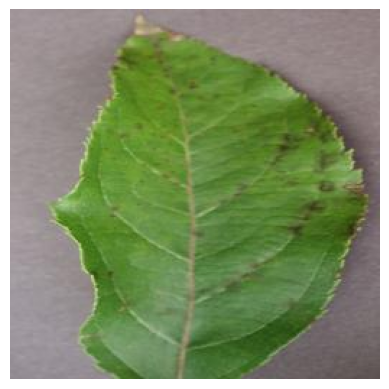

In [16]:
image_path = 'plantvillage dataset/color/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [17]:
image_path = 'plantvillage dataset/color/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[160 148 152]
  [161 149 153]
  [161 149 153]
  ...
  [145 129 130]
  [142 126 127]
  [140 124 125]]

 [[160 148 152]
  [160 148 152]
  [160 148 152]
  ...
  [141 125 126]
  [139 123 124]
  [138 122 123]]

 [[162 150 154]
  [161 149 153]
  [160 148 152]
  ...
  [141 125 126]
  [142 126 127]
  [142 126 127]]

 ...

 [[151 144 151]
  [150 143 150]
  [148 141 148]
  ...
  [ 94  84  83]
  [ 92  82  81]
  [ 92  82  81]]

 [[148 141 148]
  [147 140 147]
  [147 140 147]
  ...
  [ 93  83  82]
  [ 92  82  81]
  [ 91  81  80]]

 [[144 137 144]
  [144 137 144]
  [145 138 145]
  ...
  [ 93  83  82]
  [ 92  82  81]
  [ 91  81  80]]]


In [18]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [19]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [20]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [21]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [22]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [23]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [24]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [25]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 1482s 1s/step - loss: 0.9669 - accuracy: 0.7363 - val_loss: 0.4615 - val_accuracy: 0.8553
Epoch 2/5
1358/1358 [==============================] - 1285s 946ms/step - loss: 0.2789 - accuracy: 0.9120 - val_loss: 0.3814 - val_accuracy: 0.8829
Epoch 3/5
1358/1358 [==============================] - 1169s 861ms/step - loss: 0.1278 - accuracy: 0.9582 - val_loss: 0.5031 - val_accuracy: 0.8645
Epoch 4/5
1358/1358 [==============================] - 1178s 867ms/step - loss: 0.0964 - accuracy: 0.9693 - val_loss: 0.4884 - val_accuracy: 0.8800
Epoch 5/5
1358/1358 [==============================] - 1940s 1s/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.5565 - val_accuracy: 0.8733


**Model Evaluation**

In [26]:
# Model Evaluation
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

339/339 [==============================] - 46s 134ms/step - loss: 0.5564 - accuracy: 0.8734
Validation Accuracy: 87.34%


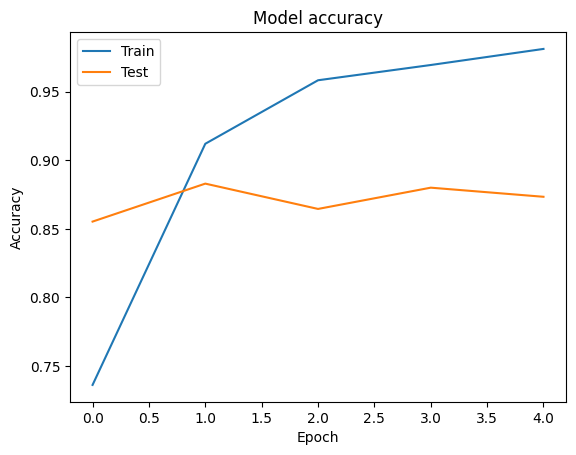

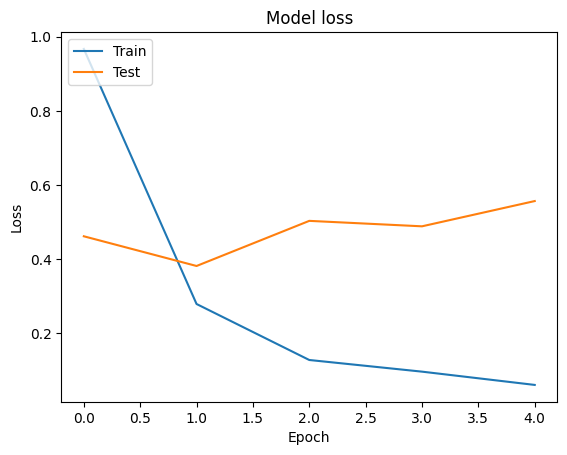

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [28]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [29]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [30]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [33]:
# saving the class names as json file
json.dump(class_indices, open('app/class_indices.json', 'w'))

In [34]:
# Example Usage
image_path = 'test_images/test_apple_black_rot.JPG'

predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 123ms/step
Predicted Class Name: Apple___Black_rot


**Save the model**

In [35]:
model.save('app/plant_disease_prediction_model.h5')

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
